In [1]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import pandas as pd

# Load the data
file_path = 'ICOSETC_DE-RuR_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Display the filtered data
print(data_filtered.head())


    TIMESTAMP  TA_F_MDS  TA_F_MDS_QC  TA_F_MDS_NIGHT  TA_F_MDS_NIGHT_SD  \
48 2015-01-01     0.596          1.0           0.220              1.067   
49 2015-02-01    -0.135          1.0          -0.544              1.135   
50 2015-03-01     3.456          1.0           2.239              1.552   
51 2015-04-01     6.555          1.0           4.108              2.372   
52 2015-05-01     9.935          1.0           7.461              1.936   

    TA_F_MDS_NIGHT_QC  TA_F_MDS_DAY  TA_F_MDS_DAY_SD  TA_F_MDS_DAY_QC  TA_ERA  \
48                1.0         1.262            0.699              1.0   2.186   
49                1.0         0.404            1.304              1.0   1.730   
50                1.0         4.670            1.857              1.0   5.185   
51                1.0         8.280            2.853              1.0   7.298   
52                1.0        11.239            2.597              1.0  11.220   

    ...  GPP_DT_CUT_USTAR50  GPP_DT_CUT_MEAN  GPP_DT_CUT_SE  G

In [38]:
data_filtered['TIMESTAMP'] = pd.to_datetime(data_filtered['TIMESTAMP'], format='%Y%m')

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Display the first few rows of le_data to verify
print(le_data)

                  LE
TIMESTAMP           
2015-01-01   8.27651
2015-02-01   7.76911
2015-03-01  27.87360
2015-04-01  57.91960
2015-05-01  75.87330
...              ...
2024-08-01  77.36090
2024-09-01  46.43410
2024-10-01  24.03330
2024-11-01   8.90106
2024-12-01   8.18806

[120 rows x 1 columns]


C:\Users\chinthaparthy\AppData\Local\Temp\ipykernel_20652\3205764162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['TIMESTAMP'] = pd.to_datetime(data_filtered['TIMESTAMP'], format='%Y%m')


In [39]:
le_data

,LE
TIMESTAMP,
2015-01-01,8.27651
2015-02-01,7.76911
2015-03-01,27.87360
2015-04-01,57.91960
2015-05-01,75.87330
...,...
2024-08-01,77.36090
2024-09-01,46.43410
2024-10-01,24.03330


In [25]:
le_data.index 

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=120, freq=None)

In [31]:
# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')


In [ ]:
annual_le_data

In [32]:
quarterly_le_data = resample_data(le_data, 'QE')

In [33]:
quarterly_le_data

,LE
TIMESTAMP,
2015-03-31,14.639740
2015-06-30,70.949200
2015-09-30,66.296300
2015-12-31,16.571600
2016-03-31,13.981630
2016-06-30,59.209467
2016-09-30,68.406000
2016-12-31,14.302640
2017-03-31,17.087683


In [26]:
quarterly_le_data = resample_data(le_data, 'QE')

# Define seasonal data
seasonal_le_data = {
    'Winter': quarterly_le_data[quarterly_le_data.index.month.isin([12, 1, 2])],
    'Spring': quarterly_le_data[quarterly_le_data.index.month.isin([3, 4, 5])],
    'Summer': quarterly_le_data[quarterly_le_data.index.month.isin([6, 7, 8])],
    'Autumn': quarterly_le_data[quarterly_le_data.index.month.isin([9, 10, 11])]
}

# Display the seasonal data
print("Winter Data:")
print(seasonal_le_data['Winter'].head())

print("\nSpring Data:")
print(seasonal_le_data['Spring'].head())

Winter Data:
                   LE
TIMESTAMP            
2015-12-31  16.571600
2016-12-31  14.302640
2017-12-31  19.710400
2018-12-31  16.442033
2019-12-31  16.168700

Spring Data:
                   LE
TIMESTAMP            
2015-03-31  14.639740
2016-03-31  13.981630
2017-03-31  17.087683
2018-03-31  13.596597
2019-03-31  17.207837


In [28]:
import pymannkendall as mk

# Define a function to perform trend analysis
def perform_trend_analysis(data):
    mk_test = mk.original_test(data['LE'].dropna())
    sens_slope = mk.sens_slope(data['LE'].dropna())
    return {
        'trend': mk_test.trend,
        'h': mk_test.h,
        'p_value': mk_test.p,
        'z_score': mk_test.z,
        'sens_slope': sens_slope
    }

# Perform trend analysis on annual data
annual_le_trends = perform_trend_analysis(annual_le_data)

# Perform trend analysis on seasonal data
seasonal_le_trends = {season: perform_trend_analysis(season_data) for season, season_data in seasonal_le_data.items()}

annual_le_trends, seasonal_le_trends


({'trend': 'no trend',
  'h': np.False_,
  'p_value': np.float64(0.7205147871362552),
  'z_score': np.float64(0.35777087639996635),
  'sens_slope': Sens_Slope_Test(slope=np.float64(0.10946722222222387), intercept=np.float64(41.97767833333333))},
 {'Winter': {'trend': 'no trend',
   'h': np.False_,
   'p_value': np.float64(0.7205147871362552),
   'z_score': np.float64(-0.35777087639996635),
   'sens_slope': Sens_Slope_Test(slope=np.float64(-0.10072499999999973), intercept=np.float64(16.758629166666662))},
  'Spring': {'trend': 'increasing',
   'h': np.True_,
   'p_value': np.float64(0.01226606138621289),
   'z_score': np.float64(2.5043961347997645),
   'sens_slope': Sens_Slope_Test(slope=np.float64(0.8354866666666645), intercept=np.float64(14.438221666666676))},
  'Summer': {'trend': 'no trend',
   'h': np.False_,
   'p_value': np.float64(0.7205147871362552),
   'z_score': np.float64(0.35777087639996635),
   'sens_slope': Sens_Slope_Test(slope=np.float64(0.16432222222222492), intercept=

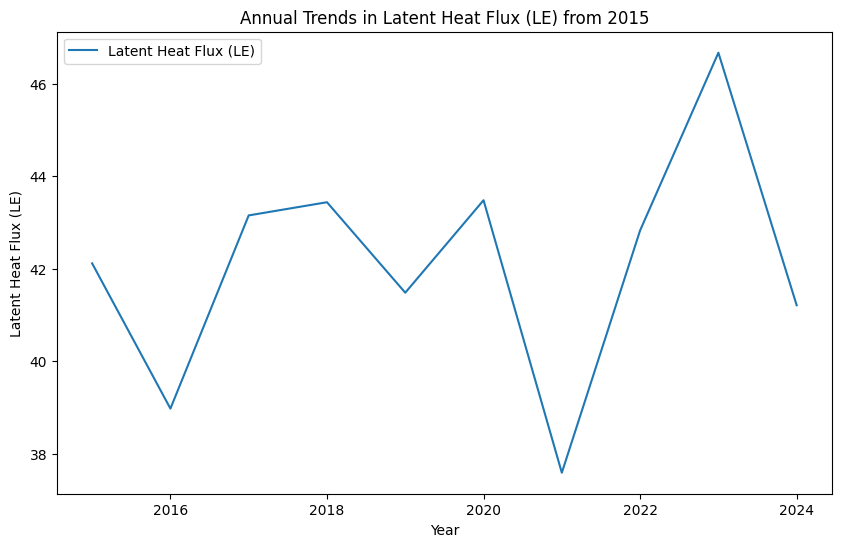

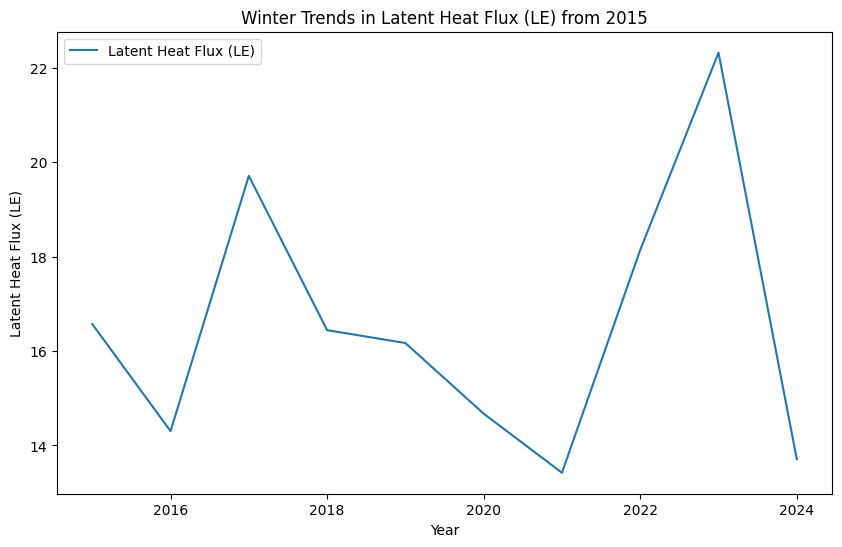

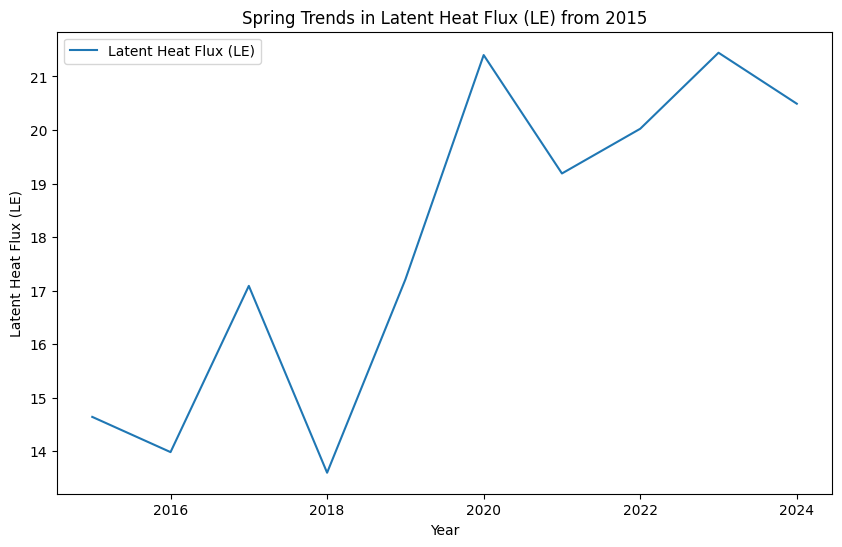

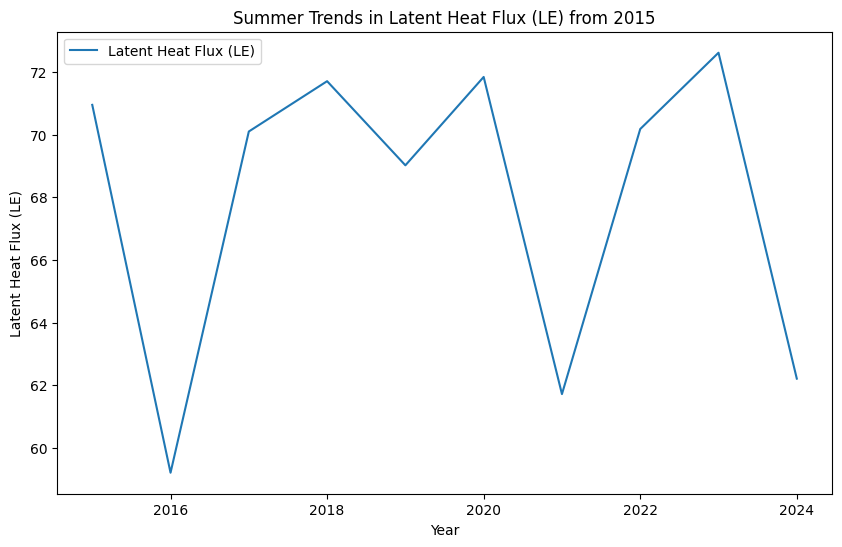

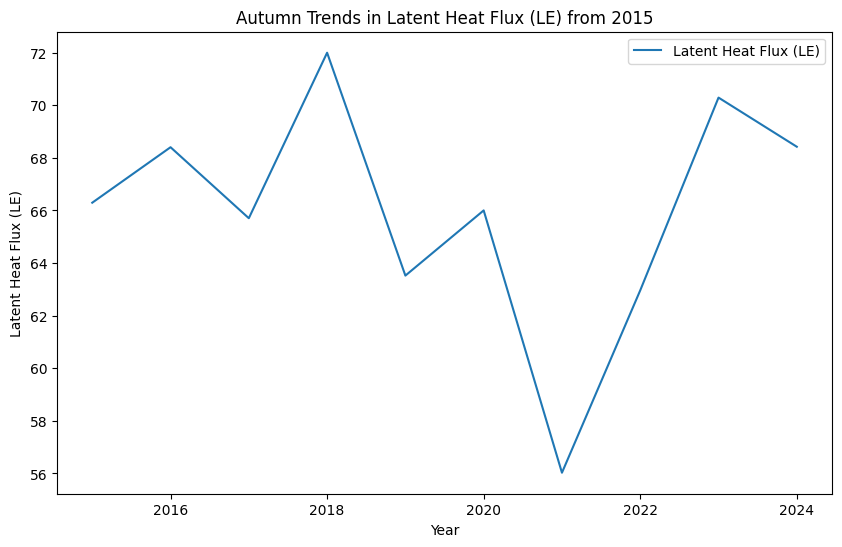

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot trends
def plot_trends(data, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=data.index.year, y='LE', label='Latent Heat Flux (LE)')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend()
    plt.show()

# Plot annual trends
plot_trends(annual_le_data, 'Annual Trends in Latent Heat Flux (LE) from 2015')

# Plot seasonal trends
for season, season_data in seasonal_le_data.items():
    plot_trends(season_data, f'{season} Trends in Latent Heat Flux (LE) from 2015')


In [42]:
# Function to assign seasons
def assign_season(date):
    year = date.year
    month = date.month
    if month == 12:
        return f'{year}-Winter'
    elif month in [1, 2]:
        return f'{year - 1}-Winter'
    elif month in [3, 4, 5]:
        return f'{year}-Spring'
    elif month in [6, 7, 8]:
        return f'{year}-Summer'
    elif month in [9, 10, 11]:
        return f'{year}-Autumn'

# Assign seasons
le_data['Season'] = le_data.index.map(assign_season)

# Group by season and calculate the mean
seasonal_means = le_data.groupby('Season')['LE'].mean()

# Display the seasonal means
print("Seasonal Means:")
print(seasonal_means)

Seasonal Means:
Season
2014-Winter     8.022810
2015-Autumn    27.090600
2015-Spring    53.888833
2015-Summer    78.472500
2015-Winter    10.884097
2016-Autumn    30.317333
2016-Spring    42.477700
2016-Summer    73.382500
2016-Winter     7.282690
2017-Autumn    30.944000
2017-Spring    54.117867
2017-Summer    78.832267
2017-Winter    11.193797
2018-Autumn    28.076167
2018-Spring    51.430667
2018-Summer    82.966867
2018-Winter    11.124170
2019-Autumn    26.136933
2019-Spring    46.066100
2019-Summer    82.533867
2019-Winter    14.820567
2020-Autumn    27.672533
2020-Spring    55.834667
2020-Summer    77.893433
2020-Winter     8.969343
2021-Autumn    26.397217
2021-Spring    45.586267
2021-Summer    68.940333
2021-Winter    12.514650
2022-Autumn    29.006967
2022-Spring    50.517000
2022-Summer    77.739267
2022-Winter    13.954833
2023-Autumn    36.118333
2023-Spring    50.159267
2023-Summer    85.170000
2023-Winter    15.826733
2024-Autumn    26.456153
2024-Spring    46.678933
20

In [45]:
seasonal_le_data

{'2014-Winter':                  LE       Season
 TIMESTAMP                       
 2015-01-01  8.27651  2014-Winter
 2015-02-01  7.76911  2014-Winter,
 '2015-Spring':                  LE       Season
 TIMESTAMP                       
 2015-03-01  27.8736  2015-Spring
 2015-04-01  57.9196  2015-Spring
 2015-05-01  75.8733  2015-Spring,
 '2015-Summer':                  LE       Season
 TIMESTAMP                       
 2015-06-01  79.0547  2015-Summer
 2015-07-01  84.9839  2015-Summer
 2015-08-01  71.3789  2015-Summer,
 '2015-Autumn':                  LE       Season
 TIMESTAMP                       
 2015-09-01  42.5261  2015-Autumn
 2015-10-01  19.0094  2015-Autumn
 2015-11-01  19.7363  2015-Autumn,
 '2015-Winter':                   LE       Season
 TIMESTAMP                        
 2015-12-01  10.96910  2015-Winter
 2016-01-01   7.72479  2015-Winter
 2016-02-01  13.95840  2015-Winter,
 '2016-Spring':                  LE       Season
 TIMESTAMP                       
 2016-03-01  20.

In [46]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ICOSETC_DE-RuR_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')

# Resample to seasonal means
def get_seasonal_data(data):
    seasonal_data = {
        'Winter': data[data.index.month.isin([12, 1, 2])].resample('YE').mean(),
        'Spring': data[data.index.month.isin([3, 4, 5])].resample('YE').mean(),
        'Summer': data[data.index.month.isin([6, 7, 8])].resample('YE').mean(),
        'Autumn': data[data.index.month.isin([9, 10, 11])].resample('YE').mean()
    }
    return seasonal_data

seasonal_le_data = get_seasonal_data(le_data)

In [47]:
seasonal_le_data 

{'Winter':                    LE
 TIMESTAMP            
 2015-12-31   9.004907
 2016-12-31   9.722203
 2017-12-31   8.708417
 2018-12-31  11.269230
 2019-12-31  11.183437
 2020-12-31  12.515523
 2021-12-31   9.432330
 2022-12-31  14.042173
 2023-12-31  15.220833
 2024-12-31  13.549720,
 'Spring':                    LE
 TIMESTAMP            
 2015-12-31  53.888833
 2016-12-31  42.477700
 2017-12-31  54.117867
 2018-12-31  51.430667
 2019-12-31  46.066100
 2020-12-31  55.834667
 2021-12-31  45.586267
 2022-12-31  50.517000
 2023-12-31  50.159267
 2024-12-31  46.678933,
 'Summer':                    LE
 TIMESTAMP            
 2015-12-31  78.472500
 2016-12-31  73.382500
 2017-12-31  78.832267
 2018-12-31  82.966867
 2019-12-31  82.533867
 2020-12-31  77.893433
 2021-12-31  68.940333
 2022-12-31  77.739267
 2023-12-31  85.170000
 2024-12-31  78.150233,
 'Autumn':                    LE
 TIMESTAMP            
 2015-12-31  27.090600
 2016-12-31  30.317333
 2017-12-31  30.944000
 2018-12-31  2

In [50]:
seasonal_le_data['Winter']

,LE
TIMESTAMP,
2015-12-31,9.004907
2016-12-31,9.722203
2017-12-31,8.708417
2018-12-31,11.269230
2019-12-31,11.183437
2020-12-31,12.515523
2021-12-31,9.432330
2022-12-31,14.042173
2023-12-31,15.220833


In [51]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ICOSETC_DE-RuR_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')

# Function to handle winter season separately
def get_winter_data(data):
    winter_data = []
    years = range(data.index.year.min(), data.index.year.max())
    for year in years:
        # Select December of the current year and January, February of the next year
        winter_period = data.loc[f'{year}-12-01':f'{year+1}-02-28']
        winter_mean = winter_period.mean()
        winter_data.append(winter_mean)
    return pd.DataFrame(winter_data, index=pd.date_range(f'{years.start}-12-01', periods=len(years), freq='YE'))

# Get winter data
winter_le_data = get_winter_data(le_data)

In [52]:
winter_le_data

,LE
2015-12-31,10.884097
2016-12-31,7.282690
2017-12-31,11.193797
2018-12-31,11.124170
2019-12-31,14.820567
2020-12-31,8.969343
2021-12-31,12.514650
2022-12-31,13.954833
2023-12-31,15.826733


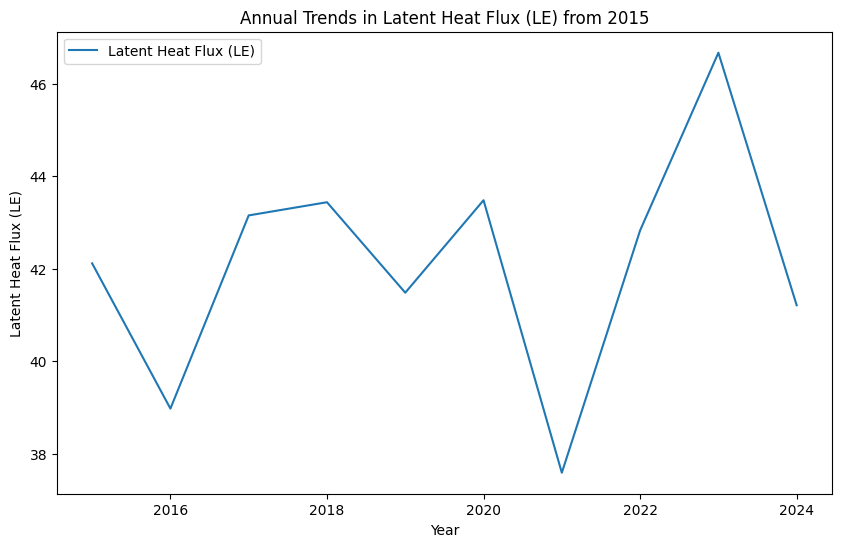

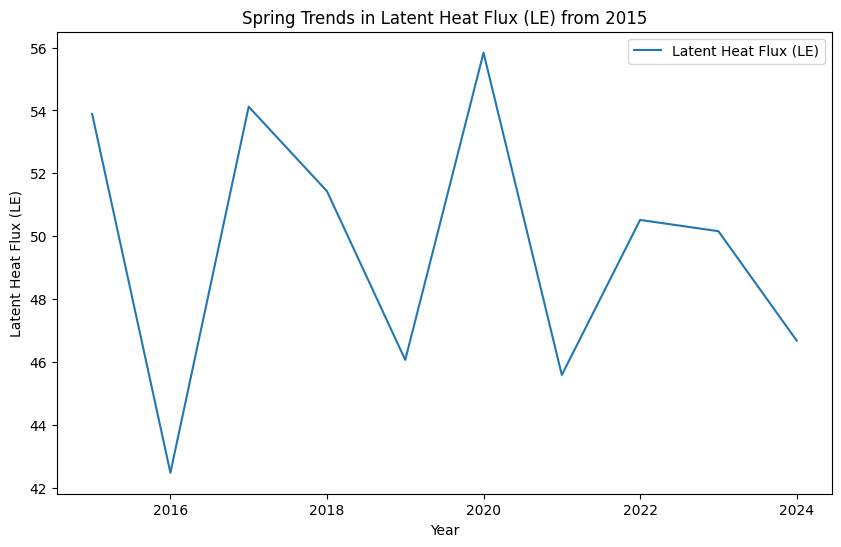

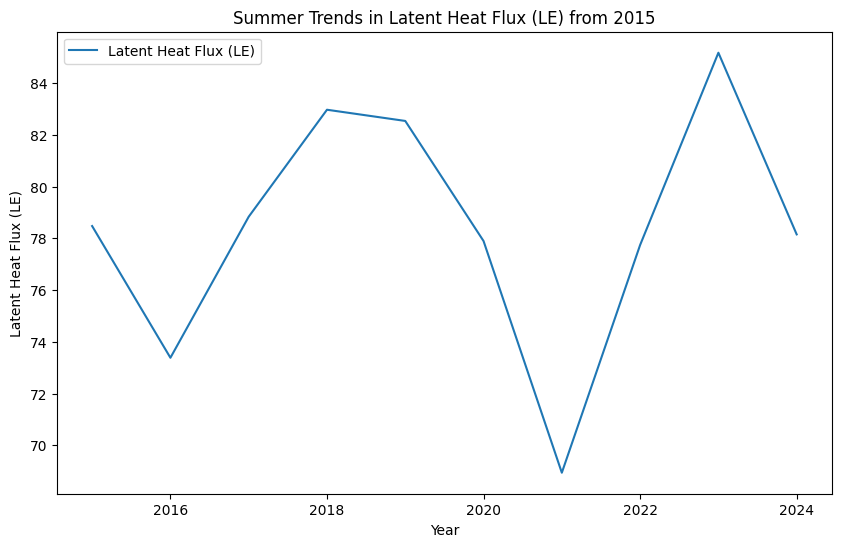

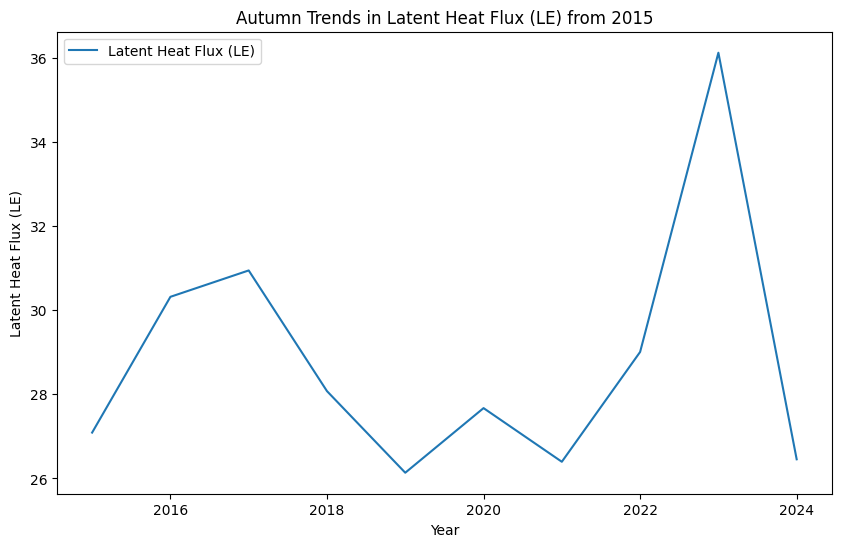

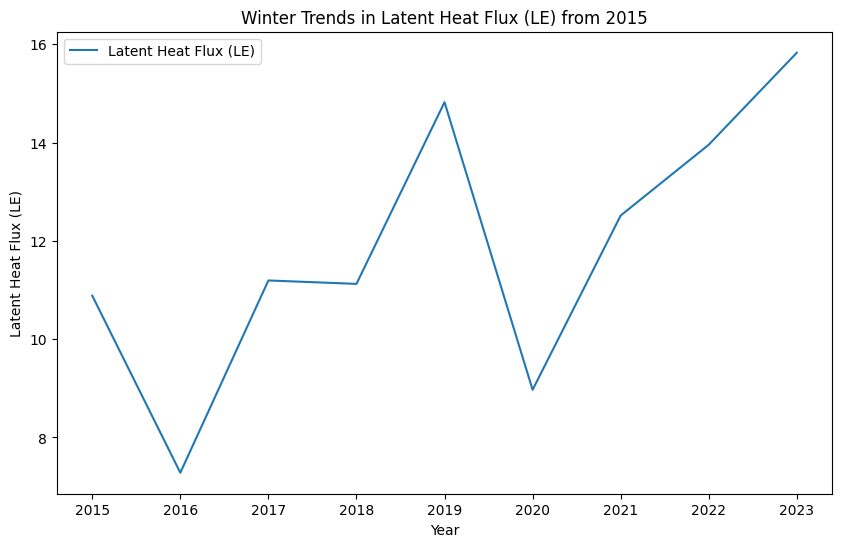

Annual Trend Analysis:
{'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.7205147871362552), 'z_score': np.float64(0.35777087639996635), 'sens_slope': Sens_Slope_Test(slope=np.float64(0.10946722222222387), intercept=np.float64(41.97767833333333))}

Seasonal Trend Analysis:
Spring: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(0.5915050369949166), 'z_score': np.float64(-0.5366563145999494), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.3577333333333286), intercept=np.float64(51.94793333333331))}
Summer: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(1.0), 'z_score': np.float64(0.0), 'sens_slope': Sens_Slope_Test(slope=np.float64(0.06419999999999959), intercept=np.float64(78.02246666666667))}
Autumn: {'trend': 'no trend', 'h': np.False_, 'p_value': np.float64(1.0), 'z_score': np.float64(0.0), 'sens_slope': Sens_Slope_Test(slope=np.float64(-0.07049407407407395), intercept=np.float64(28.19157333333333))}
Winter: {'trend': 'increasing', 'h': np.True

In [54]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'ICOSETC_DE-RuR_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the LE_F_MDS column and rename it to LE
le_data = data_filtered[['LE_F_MDS']].rename(columns={'LE_F_MDS': 'LE'})

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_le_data = resample_data(le_data, 'YE')

# Function to handle winter season separately
def get_winter_data(data):
    winter_data = []
    years = range(data.index.year.min(), data.index.year.max())
    for year in years:
        # Select December of the current year and January, February of the next year
        winter_period = data.loc[f'{year}-12-01':f'{year+1}-02-28']
        winter_mean = winter_period.mean()
        winter_data.append(winter_mean)
    return pd.DataFrame(winter_data, index=pd.date_range(f'{years.start}-12-01', periods=len(years), freq='YE'))

# Get winter data
winter_le_data = get_winter_data(le_data)

# Resample to seasonal means for Spring, Summer, Autumn
seasonal_le_data = {
    'Spring': le_data[le_data.index.month.isin([3, 4, 5])].resample('YE').mean(),
    'Summer': le_data[le_data.index.month.isin([6, 7, 8])].resample('YE').mean(),
    'Autumn': le_data[le_data.index.month.isin([9, 10, 11])].resample('YE').mean()
}

# Include winter data
seasonal_le_data['Winter'] = winter_le_data

# Define a function to perform trend analysis
def perform_trend_analysis(data):
    if len(data['LE'].dropna()) < 3:  # Ensure there are enough data points
        return {
            'trend': None,
            'h': None,
            'p_value': None,
            'z_score': None,
            'sens_slope': None
        }
    mk_test = mk.original_test(data['LE'].dropna())
    sens_slope = mk.sens_slope(data['LE'].dropna())
    return {
        'trend': mk_test.trend,
        'h': mk_test.h,
        'p_value': mk_test.p,
        'z_score': mk_test.z,
        'sens_slope': sens_slope
    }

# Perform trend analysis on annual data
annual_le_trends = perform_trend_analysis(annual_le_data)

# Perform trend analysis on seasonal data
seasonal_le_trends = {season: perform_trend_analysis(season_data) for season, season_data in seasonal_le_data.items()}

# Define a function to plot trends
def plot_trends(data, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=data.index.year, y='LE', label='Latent Heat Flux (LE)')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend()
    plt.show()

# Plot annual trends
plot_trends(annual_le_data, 'Annual Trends in Latent Heat Flux (LE) from 2015')

# Plot seasonal trends
for season, season_data in seasonal_le_data.items():
    if not season_data.empty:
        plot_trends(season_data, f'{season} Trends in Latent Heat Flux (LE) from 2015')

# Display the trend analysis results
print("Annual Trend Analysis:")
print(annual_le_trends)

print("\nSeasonal Trend Analysis:")
for season, trends in seasonal_le_trends.items():
    print(f"{season}: {trends}")


In [ ]:
import pandas as pd
import pymannkendall as mk

# Load the data
file_path = 'ICOSETC_DE-RuR_FLUXNET_MM_L2.csv'
data = pd.read_csv(file_path)

# Convert the TIMESTAMP column to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], format='%Y%m')

# Filter data for timestamps greater than December 2014
data_filtered = data[data['TIMESTAMP'] > pd.to_datetime('2014-12-31')]

# Set the TIMESTAMP column as the index
data_filtered.set_index('TIMESTAMP', inplace=True)

# Extract the necessary variables
variables_of_interest = {
    'LE_F_MDS': 'Latent Heat Flux (LE)',
    'H_F_MDS': 'Sensible Heat Flux (H)',
    'G_F_MDS': 'Ground Heat Flux (G)',
    'NETRAD': 'Net Radiation (NETRAD)',
    'TA_F': 'Air Temperature (TA)',
    'TS_F_MDS_1': 'Soil Temperature (TS)',
    'VPD_F': 'Vapor Pressure Deficit (VPD)',
    'P_F': 'Precipitation (P)',
    'SWC_F_MDS_1': 'Soil Water Content (SWC)',
    'GPP_NT_VUT_MEAN': 'Gross Primary Product (GPP)'
}

# Select the variables of interest
data_subset = data_filtered[variables_of_interest.keys()].rename(columns=variables_of_interest)

# Define a function to resample data
def resample_data(data, freq):
    return data.resample(freq).mean()

# Resample to annual means
annual_data = resample_data(data_subset, 'YE')

# Function to get winter data
def get_winter_data(data):
    winter_data = []
    years = range(data.index.year.min(), data.index.year.max())
    for year in years:
        # Select December of the current year and January, February of the next year
        winter_period = data.loc[f'{year}-12-01':f'{year+1}-02-28']
        winter_mean = winter_period.mean()
        winter_data.append(winter_mean)
    return pd.DataFrame(winter_data, index=pd.date_range(f'{years.start}-12-01', periods=len(years), freq='YE'))

# Get winter data
winter_data = get_winter_data(data_subset)

# Resample to seasonal means for Spring, Summer, Autumn
seasonal_data = {
    'Spring': data_subset[data_subset.index.month.isin([3, 4, 5])].resample('YE').mean(),
    'Summer': data_subset[data_subset.index.month.isin([6, 7, 8])].resample('YE').mean(),
    'Autumn': data_subset[data_subset.index.month.isin([9, 10, 11])].resample('YE').mean()
}

# Include winter data
seasonal_data['Winter'] = winter_data

# Define a function to perform trend analysis
def perform_trend_analysis(data, column):
    if len(data[column].dropna()) < 3:  # Ensure there are enough data points
        return None
    mk_test = mk.original_test(data[column].dropna())
    return mk_test.trend

# Perform trend analysis on annual data
annual_trends = {}
for column in annual_data.columns:
    trend = perform_trend_analysis(annual_data, column)
    annual_trends[column] = 'Positive' if trend == 'increasing' else 'Negative' if trend == 'decreasing' else 'No Trend'

# Perform trend analysis on seasonal data
seasonal_trends = {}
for season, season_data in seasonal_data.items():
    seasonal_trends[season] = {}
    for column in season_data.columns:
        trend = perform_trend_analysis(season_data, column)
        seasonal_trends[season][column] = 'Positive' if trend == 'increasing' else 'Negative' if trend == 'decreasing' else 'No Trend'

# Create DataFrames to display the trend results
annual_trend_table = pd.DataFrame(list(annual_trends.items()), columns=['Variable', 'Annual Trend'])
seasonal_trend_table = pd.DataFrame([(season, variable, trend) for season, trends in seasonal_trends.items() for variable, trend in trends.items()],
                                   columns=['Season', 'Variable', 'Seasonal Trend'])

# Display the trend tables
print("Annual Trend Analysis:")
print(annual_trend_table)

print("\nSeasonal Trend Analysis:")
print(seasonal_trend_table)


Annual Trend Analysis:
                       Variable Annual Trend
0         Latent Heat Flux (LE)     No Trend
1        Sensible Heat Flux (H)     No Trend
2          Ground Heat Flux (G)     No Trend
3        Net Radiation (NETRAD)     No Trend
4          Air Temperature (TA)     Positive
5         Soil Temperature (TS)     Positive
6  Vapor Pressure Deficit (VPD)     No Trend
7             Precipitation (P)     No Trend
8      Soil Water Content (SWC)     No Trend
9   Gross Primary Product (GPP)     Positive

Seasonal Trend Analysis:
    Season                      Variable Seasonal Trend
0   Spring         Latent Heat Flux (LE)       No Trend
1   Spring        Sensible Heat Flux (H)       No Trend
2   Spring          Ground Heat Flux (G)       No Trend
3   Spring        Net Radiation (NETRAD)       No Trend
4   Spring          Air Temperature (TA)       No Trend
5   Spring         Soil Temperature (TS)       No Trend
6   Spring  Vapor Pressure Deficit (VPD)       No Trend
7   Spri

In [56]:
seasonal_trend_table

,Season,Variable,Seasonal Trend
0,Spring,Latent Heat Flux (LE),No Trend
1,Spring,Sensible Heat Flux (H),No Trend
2,Spring,Ground Heat Flux (G),No Trend
3,Spring,Net Radiation (NETRAD),No Trend
4,Spring,Air Temperature (TA),No Trend
5,Spring,Soil Temperature (TS),No Trend
6,Spring,Vapor Pressure Deficit (VPD),No Trend
7,Spring,Precipitation (P),No Trend
8,Spring,Soil Water Content (SWC),No Trend
9,Spring,Gross Primary Product (GPP),No Trend
